In [1]:
!pip install textblob

In [4]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('glassdoor_cleaned_text.csv')

In [5]:
df['sentiment_polarity'] = df['summary_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['summary_cleaned'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [6]:
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)

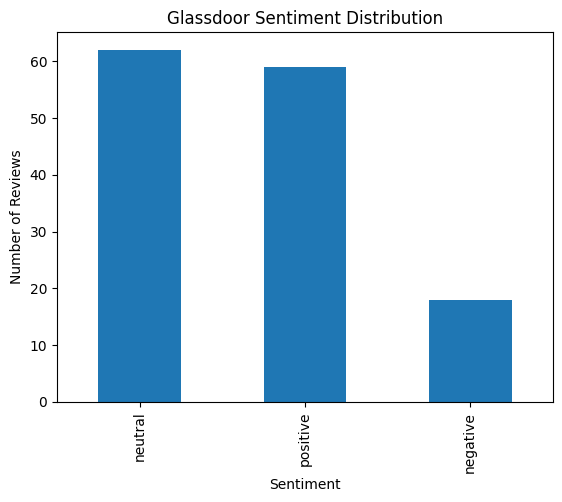

In [9]:
# Bar chart
df['sentiment_label'].value_counts().plot(kind='bar', title="Glassdoor Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

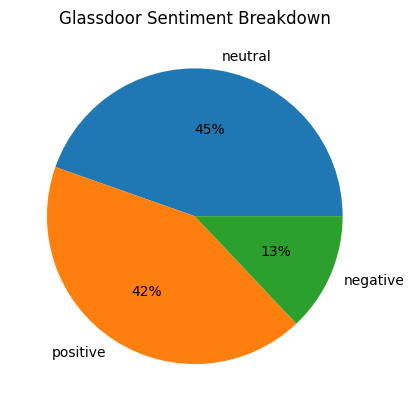

In [10]:
# Pie chart
df['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    title="Glassdoor Sentiment Breakdown"
)
plt.ylabel('')
plt.show()

In [11]:
df.to_csv('glassdoor_sentiment.csv', index=False)